<a href="https://colab.research.google.com/github/kalswjd/DA_School_1/blob/main/%08%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EC%8A%A4%EC%BF%A8_0712_MachineLearning_03_RegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Model (회귀 모델)

## 1.Linear Regression (선형 회귀)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
dataset = datasets.fetch_california_housing()

print(dataset.keys())
print(dataset.feature_names)

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

In [ ]:
# dataset 이라는 용어는 여러번 중복 사용될 수 있습니다. 정확한 데이터명을 작성해주면 좋습니다.
california = fetch_california_housing()
california

print(california.keys())
print(california.feature_names)

# y
y = california.target

df_california = pd.DataFrame(california.data, columns=california.feature_names)
df_california

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
print(df_california.isnull().sum())
print(df_california.describe())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(df_california , y, test_size=0.2,
                                                       random_state=156)


In [ ]:
import matplotlib.pyplot as plt

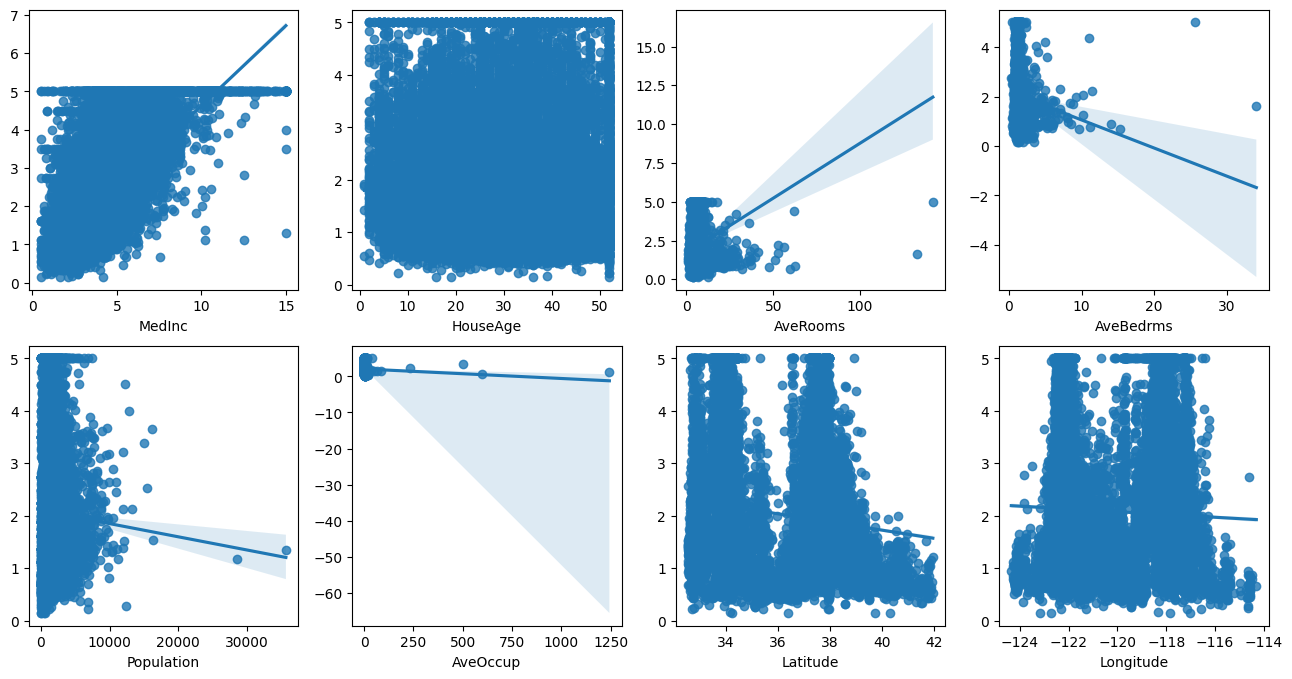

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']

for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # ax=axs[row][col] 서브플랏
    sns.regplot(x=feature , y=y,data=df_california , ax=axs[row][col])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_california)
house_scaled = scaler.transform(df_california)

house_scaled = pd.DataFrame(data=house_scaled, columns=df_california.columns)
house_scaled

X_train2 , X_test2 , y_train2 , y_test2 = train_test_split(house_scaled , y, test_size=0.2, \
                                                       random_state=156)


model_lr2 = LinearRegression()
model_lr2.fit(X_train2 ,y_train2 )
y_preds2 = model_lr2.predict(X_test2)

mse2 = mean_squared_error(y_test2, y_preds2)
rmse2 = np.sqrt(mse2)

print('MSE2 : {0:.3f} , RMSE2 : {1:.3F}'.format(mse2 , rmse2))
print('r2_score : {0:.3f}'.format(r2_score(y_test2, y_preds2)))



print('기존 표준화 전 모델 비교')

model_lr = LinearRegression()
model_lr.fit(X_train ,y_train )
y_preds = model_lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('r2_score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE2 : 0.558 , RMSE2 : 0.747
r2_score : 0.581
기존 표준화 전 모델 비교
MSE : 0.558 , RMSE : 0.747
r2_score : 0.581


## 2.다양한 회귀 모델

In [ ]:
import numpy as np
import pandas as pd # 판다스 임포트

train = pd.read_csv('/content/train.csv') # 훈련 데이터
test = pd.read_csv('/content/test.csv')   # 테스트 데이터

In [ ]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [ ]:
drop_features = ['datetime','casual','registered']

all_data = train.drop(drop_features, axis=1)

In [ ]:
all_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,0,1,9.84,14.395,81,0.0000,16
1,1,0,0,1,9.02,13.635,80,0.0000,40
2,1,0,0,1,9.02,13.635,80,0.0000,32
3,1,0,0,1,9.84,14.395,75,0.0000,13
4,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336
10882,4,0,1,1,14.76,17.425,57,15.0013,241
10883,4,0,1,1,13.94,15.910,61,15.0013,168
10884,4,0,1,1,13.94,17.425,61,6.0032,129


In [ ]:
# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = test.drop(['datetime'], axis=1)

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
y_train = train['count'] # 타깃값

In [ ]:
y = train['count'] # 타깃값

In [ ]:
X_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1,0,1,1,10.66,11.365,56,26.0027
1,1,0,1,1,10.66,13.635,56,0.0000
2,1,0,1,1,10.66,13.635,56,0.0000
3,1,0,1,1,10.66,12.880,56,11.0014
4,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014
6489,1,0,1,2,10.66,12.880,60,11.0014
6490,1,0,1,1,10.66,12.880,60,11.0014
6491,1,0,1,1,10.66,13.635,56,8.9981


### 2-1.Linear Regression (선형 회귀)

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [ ]:
linear_reg_model.fit(X_train, y) # 모델 훈련

LinearRegression()

In [ ]:
preds = linear_reg_model.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error , r2_score

mse = mean_squared_error(y, preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('r2_score : {0:.3f}'.format(r2_score(y, preds)))

MSE : 24249.683 , RMSE : 155.723
r2_score : 0.261


In [ ]:
# 로그 변환을 통한 예측

log_y = np.log(y)  # 타깃값 로그변환
linear_reg_model.fit(X_train, log_y) # 모델 훈련

LinearRegression()

In [ ]:
preds = linear_reg_model.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error , r2_score

mse = mean_squared_error(log_y, preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('r2_score : {0:.3f}'.format(r2_score(log_y, preds)))

MSE : 1.645 , RMSE : 1.282
r2_score : 0.258


In [ ]:
# 다양한 회귀 모델 적합

### 2-2.Ridge Regression (리지 회귀)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

In [ ]:
ridge_model.fit(X_train, y)

Ridge()

In [ ]:
# 하이퍼 파라미터 값 목록
ridge_params = {'max_iter':[3000], 'alpha':[1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# 그리드서치(with 릿지) 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,   # 릿지 모델
                                      param_grid=ridge_params, # 값 목록
                                      cv=5)                    # 교차검증 분할 수

In [ ]:
gridsearch_ridge_model.fit(X_train, y) # 훈련(그리드서치)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800,
                                   900, 1000],
                         'max_iter': [3000]})

In [ ]:
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 1000, 'max_iter': 3000}


In [ ]:
# 예측
preds_1 = gridsearch_ridge_model.best_estimator_.predict(X_train)

# 평가
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('r2_score : {0:.3f}'.format(r2_score(y, preds_1)))

MSE : 1.645 , RMSE : 1.282
r2_score : 0.261


### 2-3.Lasso regression (라쏘 회귀)

In [ ]:
# 라쏘 모델

In [ ]:
from sklearn.linear_model import Lasso

# 모델 생성
lasso_model = Lasso()
# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
# 그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      cv=5)
# 그리드서치 수행
gridsearch_lasso_model.fit(X_train, y)

print('최적 하이퍼파라미터 :', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 1.0, 'max_iter': 3000}


In [ ]:
# 예측
preds_2 = gridsearch_lasso_model.best_estimator_.predict(X_train)

# 평가
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('r2_score : {0:.3f}'.format(r2_score(y, preds_2)))

MSE : 1.645 , RMSE : 1.282
r2_score : 0.261


### 2-4.Random Forest Regression (랜덤 포레스트 회귀)

In [ ]:
# 랜덤 포레스트 회귀 모델

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = RandomForestRegressor()
# 그리드서치 객체 생성
rf_params = {'random_state':[42], 'n_estimators':[100, 120, 140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              cv=5)
# 그리드서치 수행
gridsearch_random_forest_model.fit(X_train, y)

print('최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


In [ ]:
# 예측
preds_3 = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# 평가
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('r2_score : {0:.3f}'.format(r2_score(y, preds_3)))

MSE : 1.645 , RMSE : 1.282
r2_score : 0.832


### 2-5.XGBoost Regression (XGBoost 회귀)

In [ ]:
import xgboost

In [ ]:
# 모델 생성
xgboost_model = xgboost.XGBRegressor()
# 그리드서치 객체 생성
xgb_params = {'random_state':[42], 'n_estimators':[100, 120, 140]}
gridsearch_xgboost_model = GridSearchCV(estimator=xgboost_model,
                                              param_grid=xgb_params,
                                              cv=5)
# 그리드서치 수행
gridsearch_xgboost_model.fit(X_train, y)

print('최적 하이퍼파라미터 :', gridsearch_xgboost_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 100, 'random_state': 42}


In [ ]:
# 예측
preds_4 = gridsearch_xgboost_model.best_estimator_.predict(X_train)

# 평가
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('r2_score : {0:.3f}'.format(r2_score(y, preds_4)))

MSE : 1.645 , RMSE : 1.282
r2_score : 0.574


## 3.로지스틱 회귀 (Logistic Regression)

In [ ]:
#-----target

#Personal Loan  ( 0 or 1 의 값을 갖는 변수이다. )

#-----feature

#Experience 경력
#Income 수입
#Famliy 가족단위
#CCAvg 월 카드사용량
#Education 교육수준 (1: undergrad; 2, Graduate; 3; Advance )
#Mortgage 가계대출
#Securities account 유가증권계좌유무
#CD account 양도예금증서 계좌 유무
#Online 온라인계좌유무
#CreidtCard 신용카드유무

SyntaxError: ignored

In [ ]:
# 필요한 Library
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time

# Personal Loan 데이터 불러오기

ploan = pd.read_csv("/content/Personal_Loan.csv")

In [ ]:
ploan

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,46,22,70,94701,4,1.9,1,212,0,0,0,0,1
2496,2497,63,37,32,93117,3,0.7,2,141,0,0,0,0,0
2497,2498,33,9,14,95133,3,0.9,3,114,0,0,0,0,0
2498,2499,38,14,111,92028,2,6.1,1,326,0,0,0,0,0


In [ ]:
# 사용하지 않을 변수 제거 ID, zip code
ploan_processed = ploan.dropna().drop(["ID","ZIP Code"], axis=1, inplace = False)

# 회귀모델에서 b0를 위한 상수항 추가

ploan_processed = sm.add_constant(ploan_processed,has_constant = "add")
ploan_processed.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
# 대출여부는 1 or 0으로 결정된다. 즉 target이 1/0의 값을 갖기에
# 로지스틱 회귀모형이 적합하다.

feature_columns = ploan_processed.columns.difference(["Personal Loan"])
X = ploan_processed[feature_columns]
y = ploan_processed["Personal Loan"]

train_x, test_x ,train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [ ]:
# 로지스틱 모형 적합

model = sm.Logit(train_y, train_x)
results = model.fit()    # 다변수함수에 뉴턴방법을 적용한 로지스틱 회귀모형

Optimization terminated successfully.
         Current function value: 0.135959
         Iterations 9


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Wed, 12 Jul 2023   Pseudo R-squ.:                  0.5881
Time:                        06:06:07   Log-Likelihood:                -237.93
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                1.397e-138
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0016      0.101     -0.016      0.987      -0.200       0.196
CCAvg                  0.0954      0.063      1.526      0.127      -0.027       0.218
CD Account             4.3674      0.531      8.226      0.000       3.327       5.408
CreditCard            -1.3552      0.349     -3.881      0.000      -2.040      -0.671
Education              1.4684      0.180      8.162      0.000       1.116       1.821
Experience             0.0165      0.101      0.163      0.870      -0.181       0.214
Family                 0.7160      0.125      5.734      0.000       0.471       0.961
Income                 0.0499      0.004     12.500      0.000       0.042       0.058
Mortgage               0.0006      0.001      0.634      0.526      -0.001       0.002
Online                -0.4918      0.262     -1.880      0.060      -1.005       0.021
Securities Account    -1.4553      0.484     -3.007      0.003      -2.404      -0.507
const                -12.5215      2.730     -4.586      0.000     -17.873      -7.170
======================================================================================
"""

In [ ]:
# Age와 CCAVG와 Experience가 유의하지 않음

In [ ]:
# 오즈비
results.params

Age                   -0.001631
CCAvg                  0.095392
CD Account             4.367360
CreditCard            -1.355179
Education              1.468420
Experience             0.016455
Family                 0.715961
Income                 0.049919
Mortgage               0.000596
Online                -0.491809
Securities Account    -1.455320
const                -12.521527
dtype: float64

In [ ]:
#- 나이가 한 살 많을수록 대출할 확률이 1.3배 낮다.
#- 교육수준이 높을수록 대출할 확률이 1.4배 높다.
#- 가족이 있으면 대출할 확률이 0.71배 낮다.


SyntaxError: ignored

In [ ]:
pred_y = results.predict(test_x)
pred_y

1816    0.005733
1195    0.102950
2085    0.005262
406     0.025856
303     0.926229
          ...   
1676    0.184499
680     0.000842
233     0.005965
2373    0.829847
2088    0.003645
Length: 750, dtype: float64

In [ ]:
# 임계값 함수

def cut_off(y, threshold) :
    Y = y.copy()  # 대문자 Y를 새로운 변수로 하여 기존의 y값에 영향이 가지 않도록 한다.
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)

pred_Y = cut_off(pred_y, 0.5)
pred_Y

1816    0
1195    0
2085    0
406     0
303     1
       ..
1676    0
680     0
233     0
2373    1
2088    0
Length: 750, dtype: int64

In [ ]:
# confusion matrix (분류 표를 나타낸 행렬)
# 0을 0으로 예측할 확률과 1을 1로 예측할 확률

cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)

[[667   6]
 [ 29  48]]


In [ ]:
# confusion matrix accuracy(정확도) 계산함수

def acc(cfmat):
  return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])

acc(cfmat)

0.9533333333333334

In [ ]:
# 임계값 0~1에 따른 정확도 확인
# 임계값에 따라서 정확도가 달라질수 있기 때문에 다음과 같은 함수를 잘 사용해야함

threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns = ['ACC'])
for i in threshold :
	pred_Y = cut_off(pred_y,i)
	cfmat = confusion_matrix(test_y,pred_Y)
	table.loc[i] = acc(cfmat)
table.index.name = "threshold"
table.columns.name = "performance"
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.900000
0.2,0.937333
0.3,0.946667
0.4,0.953333
0.5,0.953333
0.6,0.950667
0.7,0.949333
0.8,0.942667


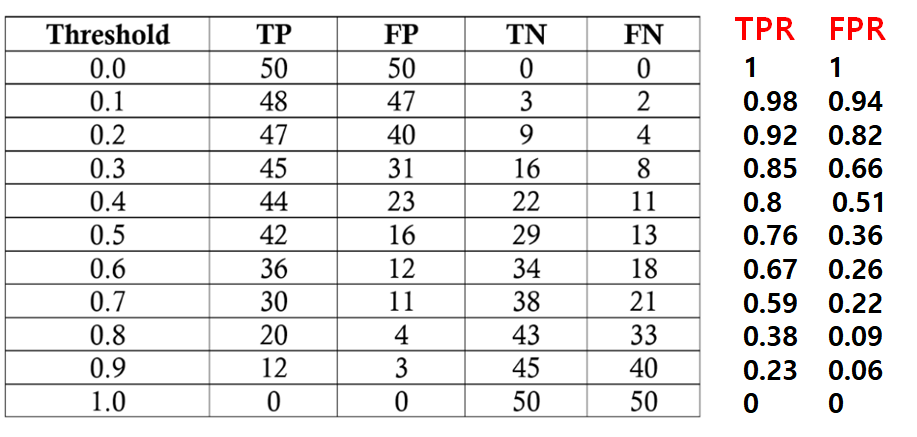

In [ ]:
TPR = TR / All positive
FPR = FP / All negative
# 정리하자면, TPR은 1에 가까울 수록 좋고, FPR은 0에 가까울 수록 좋습니다.

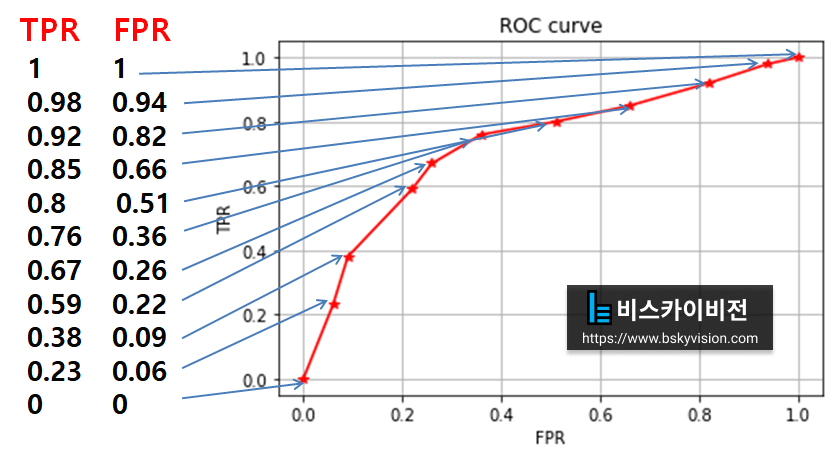

AUC: 0.9520271704521333


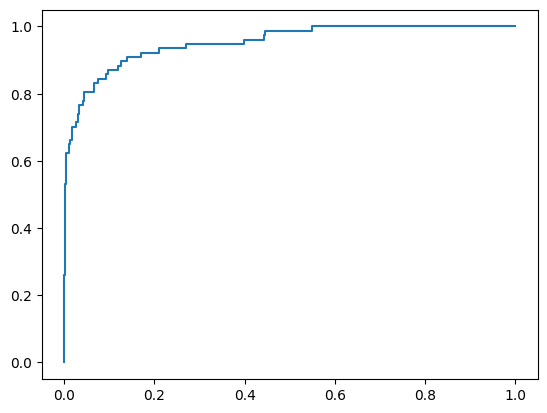

In [ ]:
# 로지스틱 회귀분석의 성능은 AUC로 측정하는 경우가 많습니다.
# decision threshold가 커지면 TPR이든 FPR이든 작아질 수 밖에 없습니다.
# 양성(0 또는 1로)으로 예측되는 경우가 적어지기 때문입니다.
# 따라서 FPR의 값이 작아질 때 TPR이 천천히 작아진다면,
# 좋은 성능을 가진 이진분류기라고 볼 수 있습니다.

# 왜냐하면 우리는 안좋은 것/ 잘일어나지 않는 것을 잘 맞추는 것에 관심이 있기 때문입니다.

# AUC는 ROC curve의 곡선 아래 영역을 나타내며 classification 성능평가지표로 많이 사용된다.
# 1에 가까울수록 성능이 우수하다고 판단하며
# 0.5인 경우에 최악의 성능이다. (이는 model이 classification 능력이 없음을 의미한다.)
# 만약 AUC값이 0.5 미만이라면 Labeling 혹은 Algorithm이 잘못됐을 가능성이 크다.
# 왠만하면 AUC는 0.6이하면 보통 모델의 성능이 낮다고 표현하며,
# 0.8이상이면 최상이라고 표현합니다.


# sklearn에서 ROC 패키지 활용
fpr, tpr, thresholds = roc_curve(test_y,pred_y,pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)